Running classifier torch on data news and label category
INFO: Evaluating classifier(s) ['torch']
INFO: Evaluating classification of classifier pytorch
INFO: Read 51197 training records from  from C:/ProjectData/Uni/classif_srch/data\news/classification\classifier_data_train.jsonl
INFO: Training classifier torch with text fields ['headline', 'short_description'] for label category
Starting training for epoch 1
Training: epoch 1 | 10/5120 batches | accuracy    0.034
Training: epoch 1 | 20/5120 batches | accuracy    0.062
Training: epoch 1 | 30/5120 batches | accuracy    0.025
Training: epoch 1 | 40/5120 batches | accuracy    0.037
Training: epoch 1 | 50/5120 batches | accuracy    0.025
Training: epoch 1 | 60/5120 batches | accuracy    0.000
Training: epoch 1 | 70/5120 batches | accuracy    0.013
Training: epoch 1 | 80/5120 batches | accuracy    0.025
Training: epoch 1 | 90/5120 batches | accuracy    0.050
Training: epoch 1 | 100/5120 batches | accuracy    0.037
Training: epoch 1 | 110/5

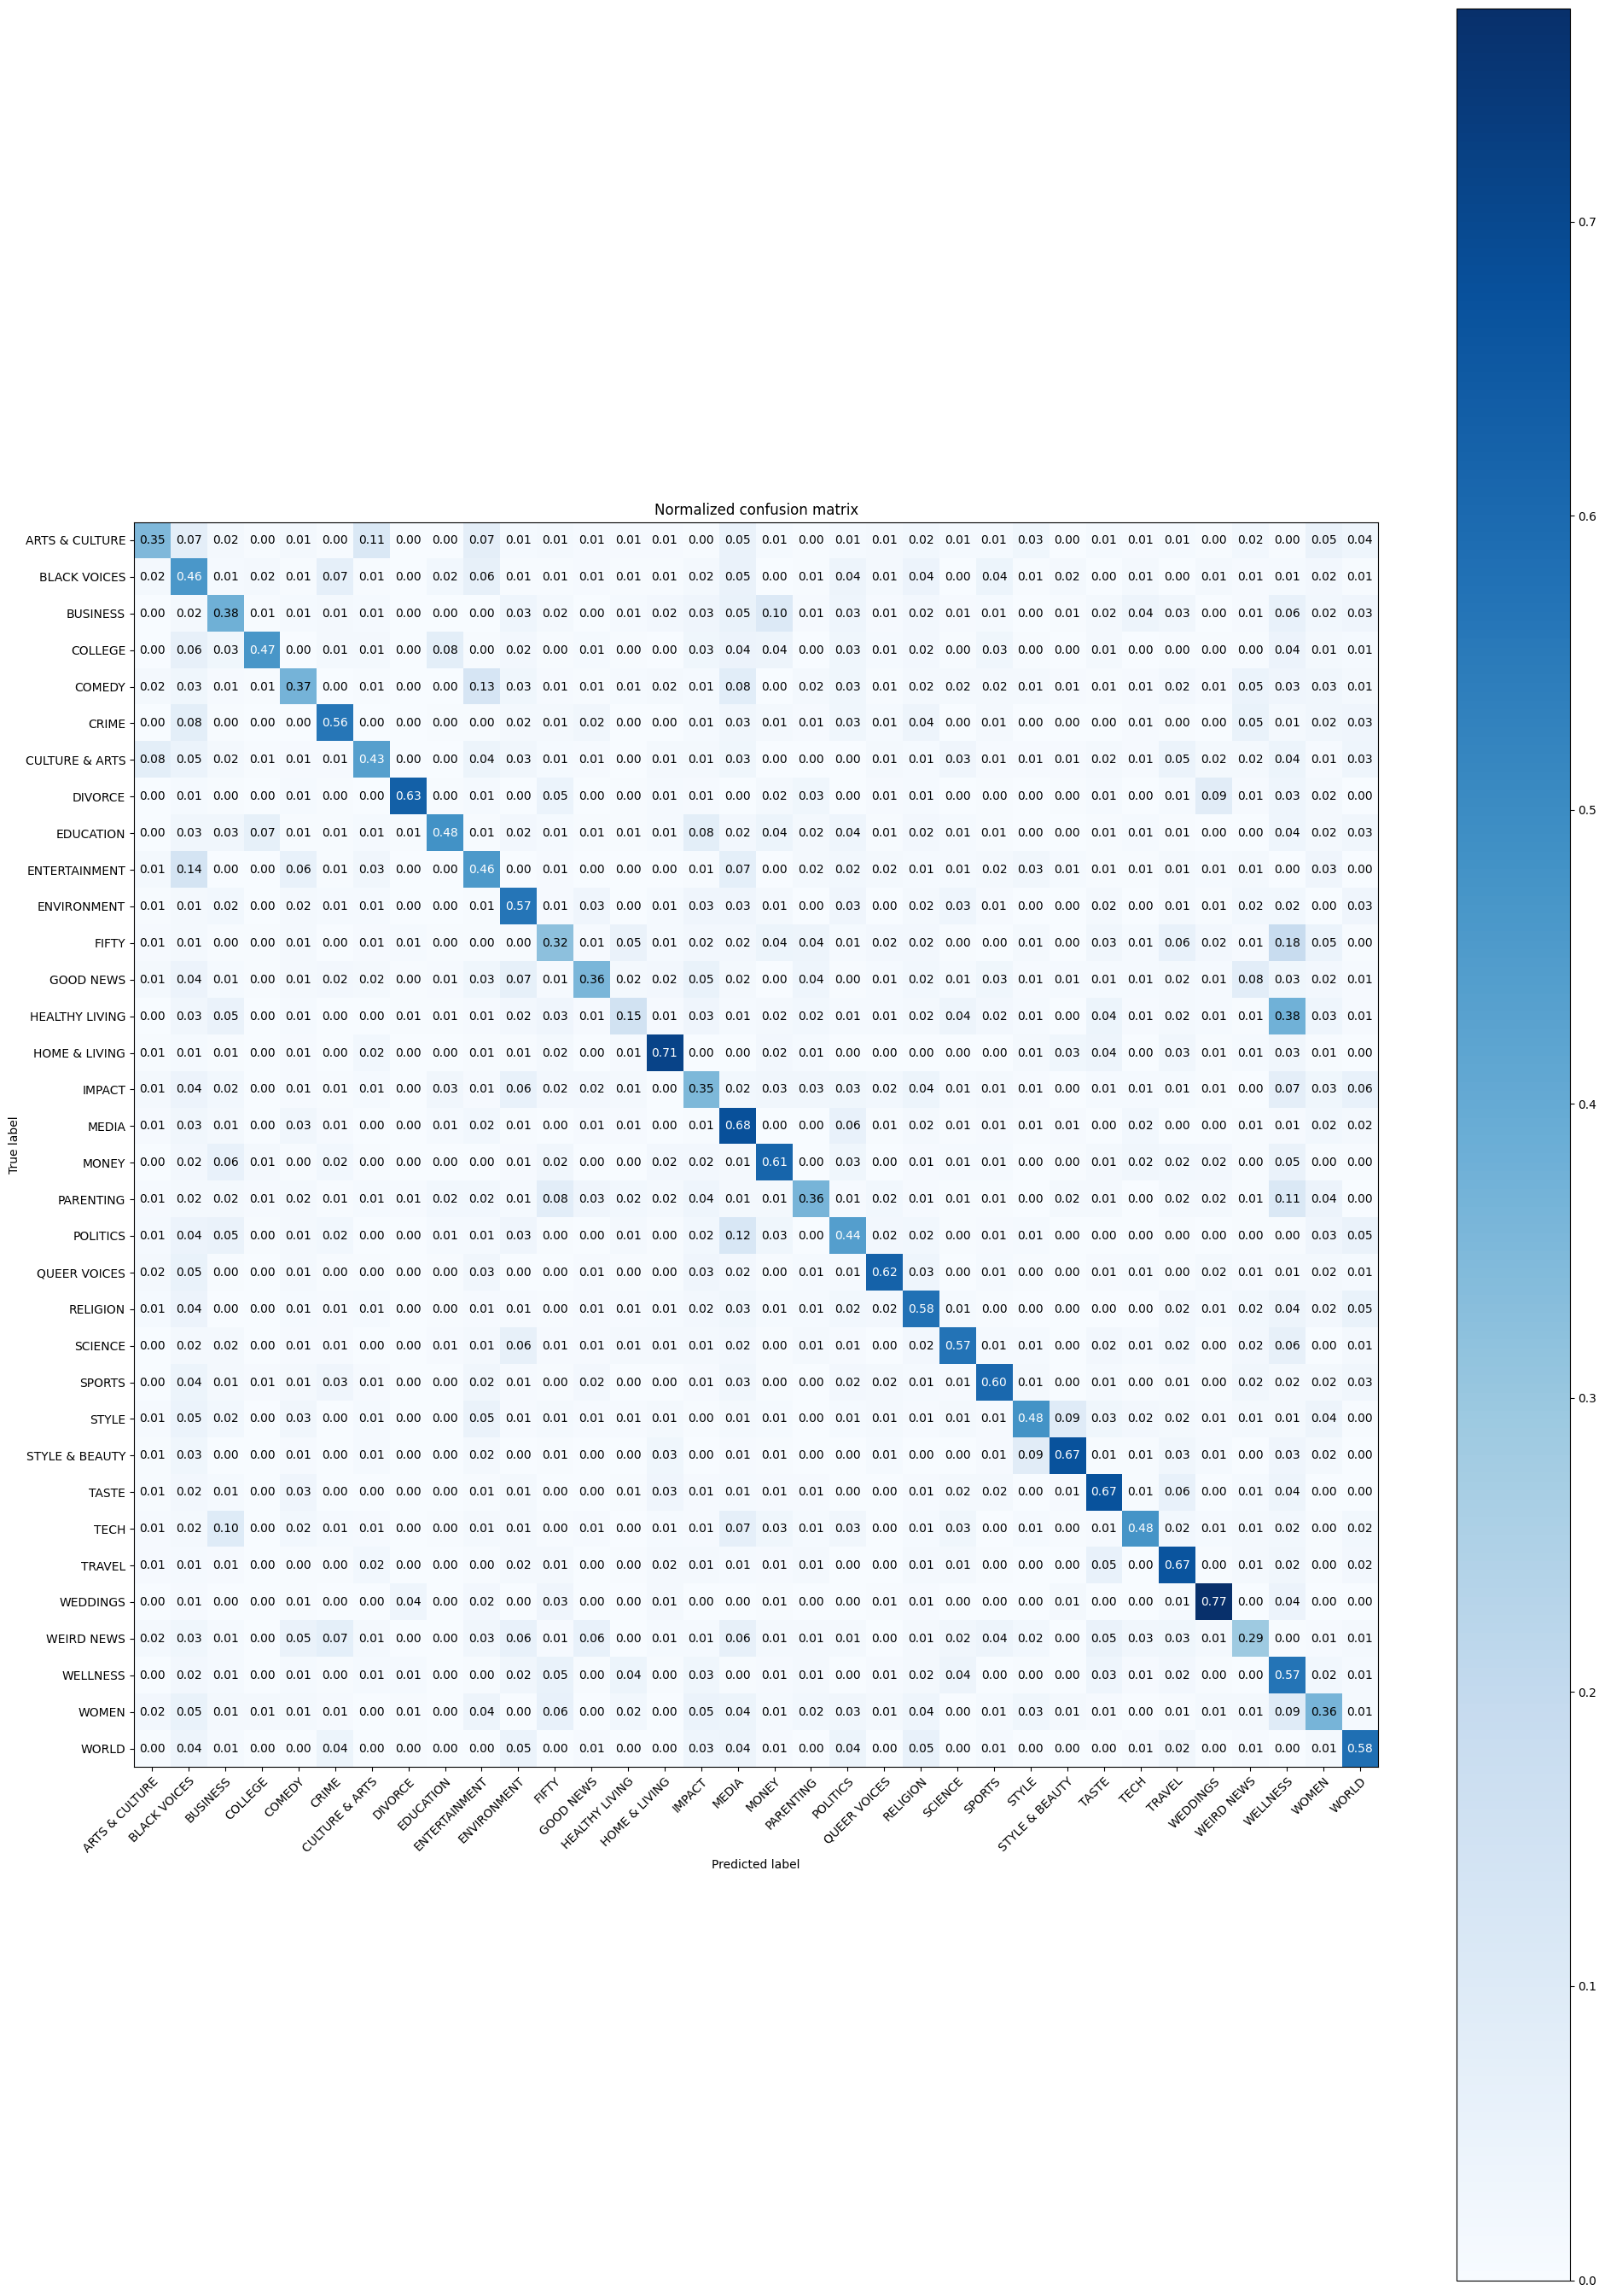

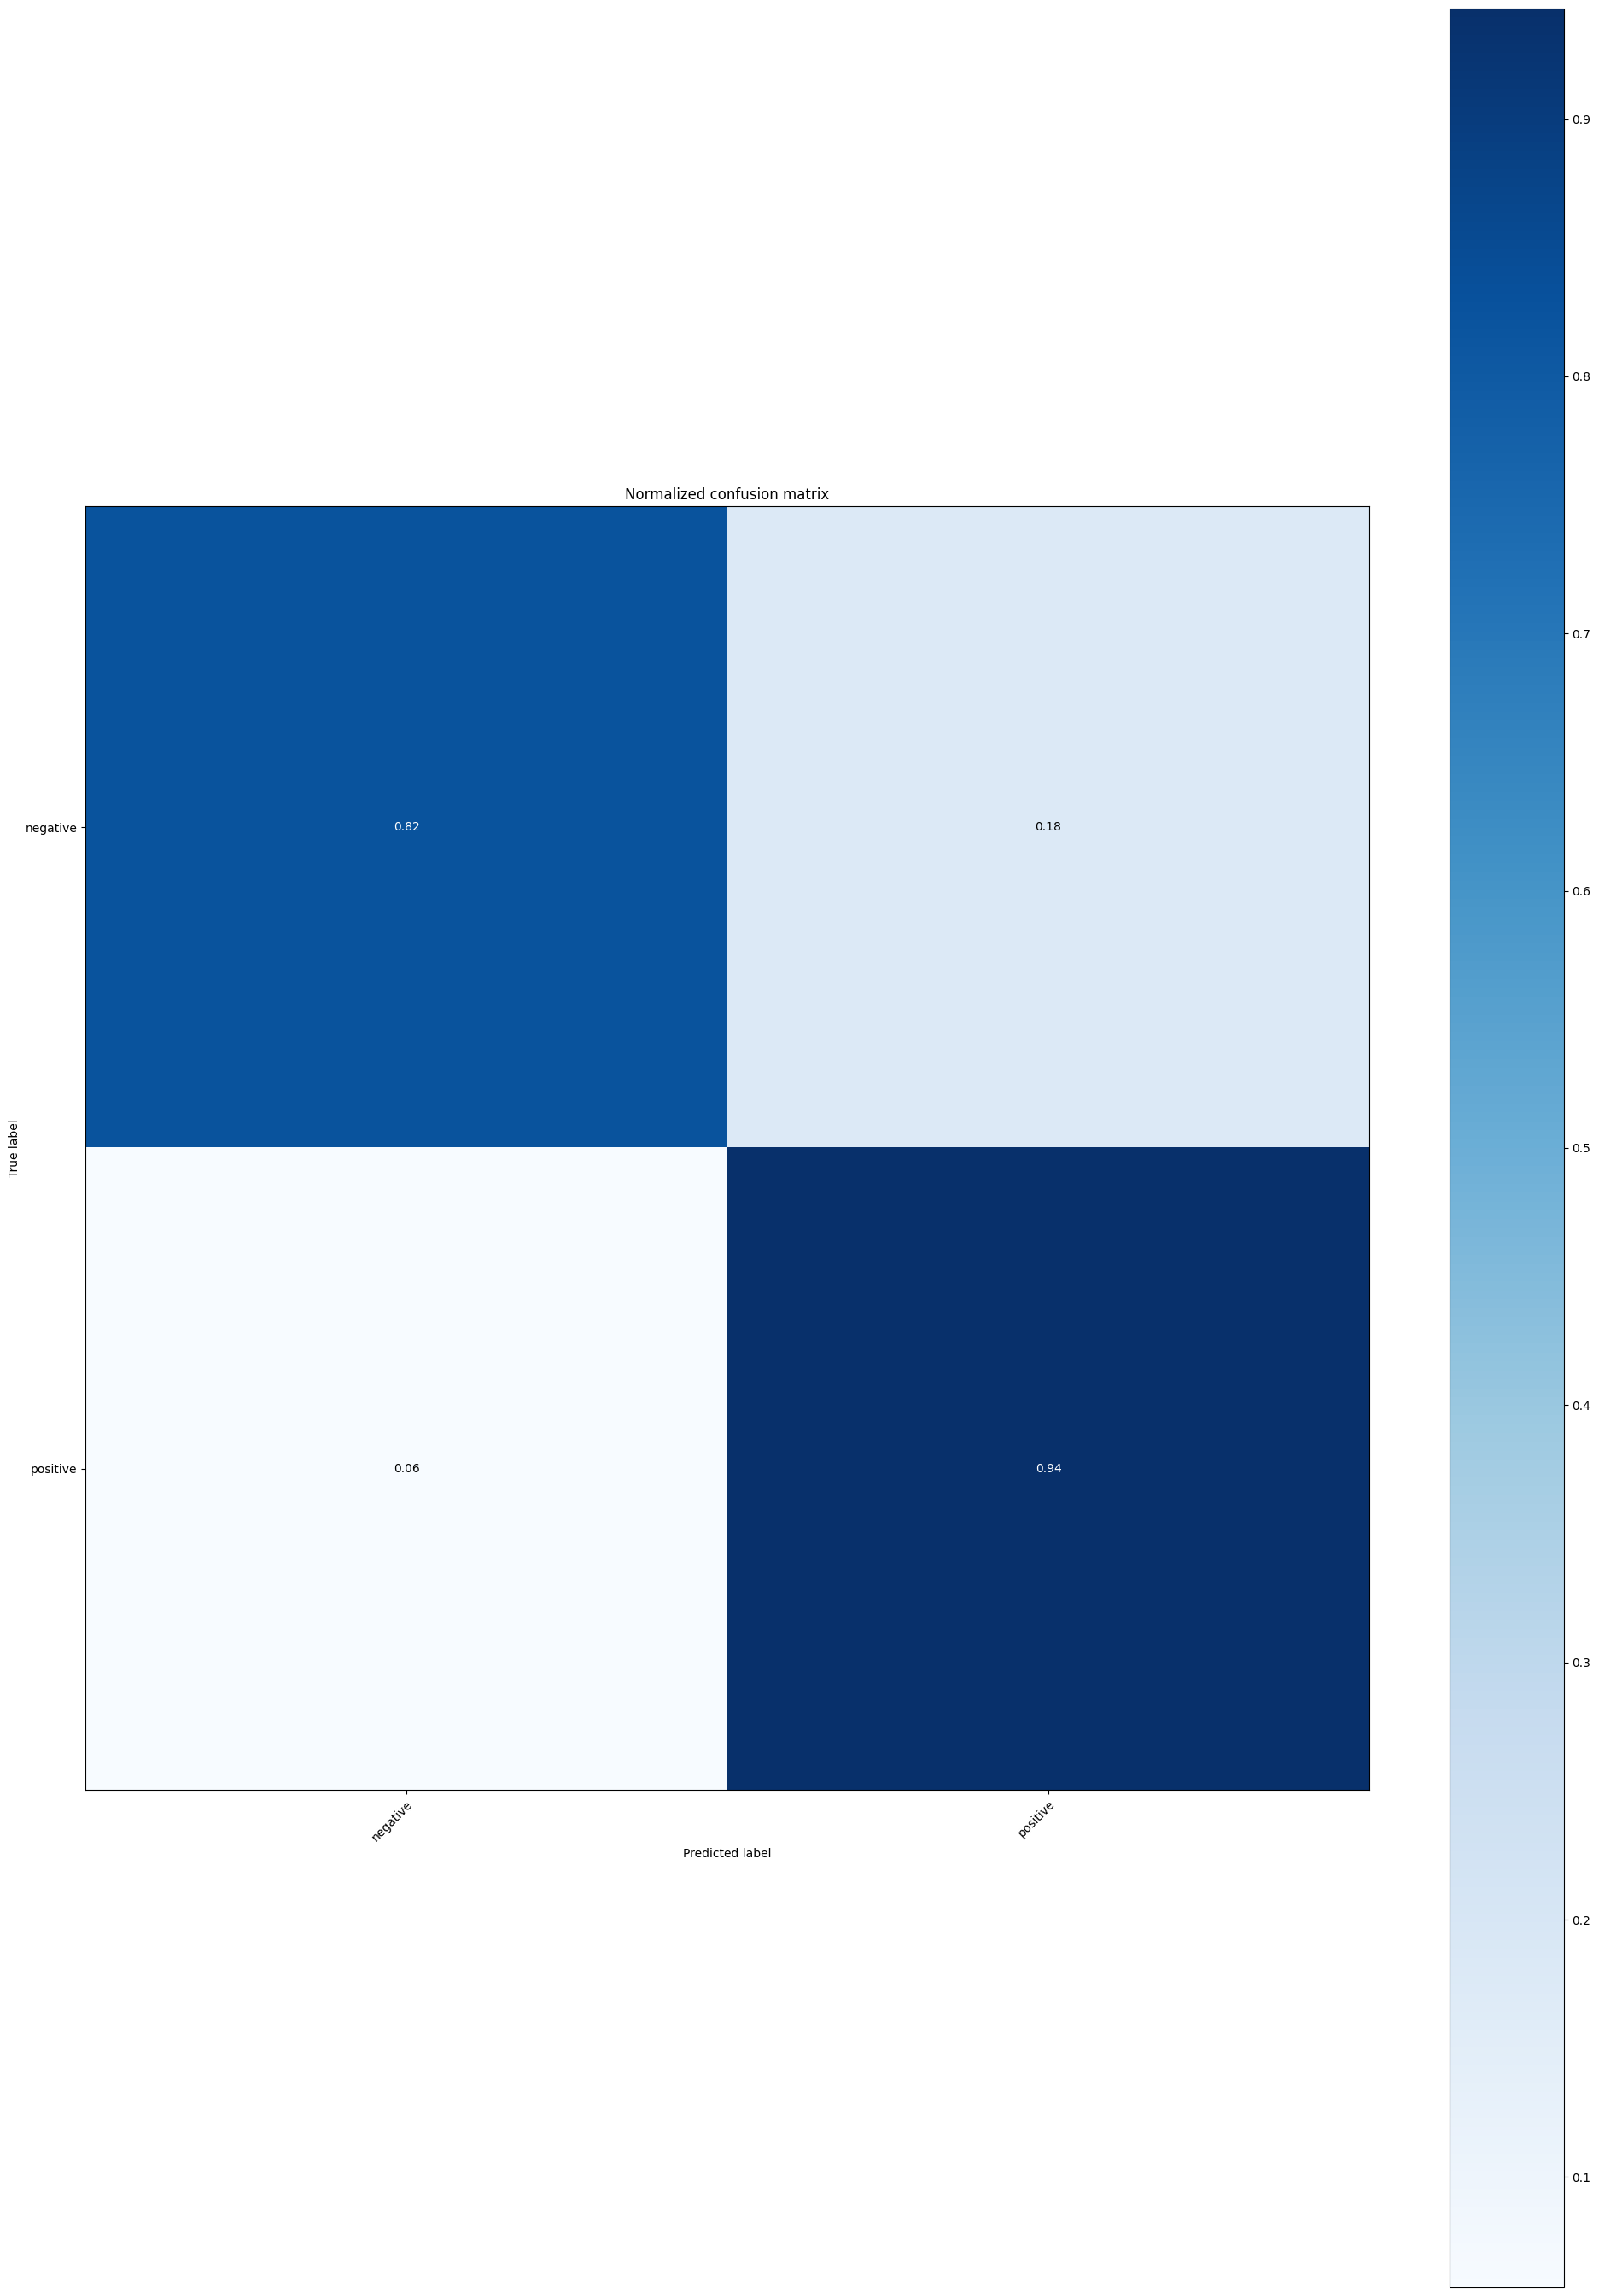

In [1]:
import os
# Convenience script (python) to run some classifiers
base_data_dir = r"C:/ProjectData/Uni/classif_srch/data"
letters_data_dir = os.path.join(base_data_dir, "letters/classification")
news_data_dir = os.path.join(base_data_dir, "news/classification")
sentiment_data_dir = os.path.join(base_data_dir, "sentiment/classification")

# Data description
# labels are the labels to use for classification
# text_label is the label comma separated list of text fields
data_configurations = [
    {
        "data_dir": letters_data_dir,
        "name": "letters",
        "labels"  : ["author", "lang"],
        "text_label" : "text"
    },
    {
        "data_dir": news_data_dir,
        "name": "news",
        "labels"  : ["category"],
        "text_label": "headline,short_description"
    },
    {
        "data_dir": sentiment_data_dir,
        "name": "sentiment",
        "labels"  : ["sentiment"],
        "text_label": "text"
    }  
]                       
  
# Classifier to use. You can use any scikit learn classifier listed in the python code  
# "DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression", "MLPClassifier",  
# "GaussianNB", "MultinomialNB", "KNeighborsClassifier", "LinearSVC", "Perceptron"  
classifier = "torch"


for configuration in data_configurations[1:]:
    data_dir = configuration["data_dir"]
    eval_data = os.path.join(data_dir,"classifier_data_eval.jsonl")
    training_data = os.path.join(data_dir,"classifier_data_train.jsonl")
    results_data_dir = os.path.join(data_dir,"results")
    text_label = configuration["text_label"]
    labels = configuration["labels"]
    name = configuration["name"]
    for label in labels:
        output_label = f"{name}"
        print(f"Running classifier {classifier} on data {output_label} and label {label}")
        %run run_classifier.py --classifier {classifier} --training {training_data} --input {eval_data} --output {results_data_dir} --label {label} --text_label {text_label}